[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/da-python/python-for-data-analytics/blob/main/Lesson2/hometask/HH-api-hometask.ipynb)

### Домашнее задание №2

# Задание
* Скачать все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, а также captcha подумайте как их можно обойти)
* Извлеките все описания этих вакансий
* Создайте DataFrame  добавьте поле skills
* Переведите даты публикаций в datetime
* Постройте график опубликованных вакансий по датам
* Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
* Найдите те вакансии с использованием python, которые вам интересны
* Определите по полю skills какие навыки больше всего востребованы для этих вакансий
* Постройте график наиболее востребованных навыков для аналитика данных

https://github.com/hhru/api

In [1]:
import requests
from tqdm.auto import tqdm
import pandas as pd

In [2]:
sber = '3529'
page = 1
num_per_page = 100
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}'

In [3]:
url = f'https://api.hh.ru/vacancies'
params = {
    'employer_id':sber,
    'page':page,
    'per_page':num_per_page,
}
res = requests.get(url, params=params)

In [4]:
# Проверка, что все работает корректно
print(res)

<Response [200]>


In [5]:
# Закачали вакансии в формате json в переменную vacancies
vacancies = res.json()
num_pages = vacancies.get('pages')
num_pages

20

In [6]:
vacancies.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [8]:
vacancy_ids = [el.get('id') for el in vacancies.get('items')]
vnum  = vacancies.get('pages')

In [9]:
# Получаем список всех id вакансий
all_vacancy_ids= []
for i in tqdm(range(vnum)):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}'
    res = requests.get(url)
    vacancies = res.json()
    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    all_vacancy_ids.extend(vacancy_ids)

  0%|          | 0/20 [00:00<?, ?it/s]

In [10]:
len(all_vacancy_ids)
# https://api.hh.ru/vacancies/66634517

2000

In [11]:
vacs = []
for vac_id in tqdm(all_vacancy_ids):
    url = f'https://api.hh.ru/vacancies/{vac_id}'
    res = requests.get(url)
    vacs.append(res.json())

  0%|          | 0/2000 [00:00<?, ?it/s]

In [12]:
res = requests.get(url)

In [13]:
# Полчаем ключи внутри item
res.json().keys()

dict_keys(['id', 'premium', 'billing_type', 'relations', 'name', 'insider_interview', 'response_letter_required', 'area', 'salary', 'type', 'address', 'allow_messages', 'experience', 'schedule', 'employment', 'department', 'contacts', 'description', 'branded_description', 'vacancy_constructor_template', 'key_skills', 'accept_handicapped', 'accept_kids', 'archived', 'response_url', 'specializations', 'professional_roles', 'code', 'hidden', 'quick_responses_allowed', 'driver_license_types', 'accept_incomplete_resumes', 'employer', 'published_at', 'created_at', 'initial_created_at', 'negotiations_url', 'suitable_resumes_url', 'apply_alternate_url', 'has_test', 'test', 'alternate_url', 'working_days', 'working_time_intervals', 'working_time_modes', 'accept_temporary', 'languages'])

In [15]:
# Формируем DataFrame
df = pd.json_normalize(vacs)

In [16]:
df.head()

,id,premium,relations,name,insider_interview,response_letter_required,allow_messages,contacts,description,branded_description,...,employer.trusted,address,salary,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,department
0,43756725,False,[],Специалист контактного центра,None,False,True,None,"<p>Сбер — это более 60 компаний экосистемы, 14...","\n<style>\n.tmpl_hh_wrapper p,\n.tmpl_hh_wrapp...",...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,55415805,False,[],Менеджер по работе с клиентами,None,False,True,None,<p>Сбер — лучший работодатель России. У нас бо...,\n<style>\n.swiper-container {\n margin: 0 ...,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,67438948,False,[],Специалист по работе с обращениями клиентов,None,False,True,None,<p>Сбер — лучший работодатель России. У нас бо...,\n<style>\n.swiper-container {\n margin: 0 ...,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,67636579,False,[],Водитель-инкассатор,None,False,False,None,<p>Сбер — лучший работодатель России. У нас бо...,None,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,67821535,False,[],Старший клиентский менеджер,None,False,True,None,<p>Сбер — лучший работодатель России. У нас бо...,\n<style>\n.swiper-container {\n margin: 0 ...,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Добавим столбец skils  с описанием навыков в таблицу
df['skills'] =df['key_skills'].apply(lambda s: ",".join([x.get('name') for x in s]))

In [18]:
# Переведем даты публикаций в  формат datetime 
import datetime
from datetime import datetime, date, time

df['published_at'] = pd.to_datetime(df['published_at'])
df['published_at']= df['published_at'].dt.strftime('%Y-%m-%d')
df['published_at'] = pd.to_datetime(df['published_at'])

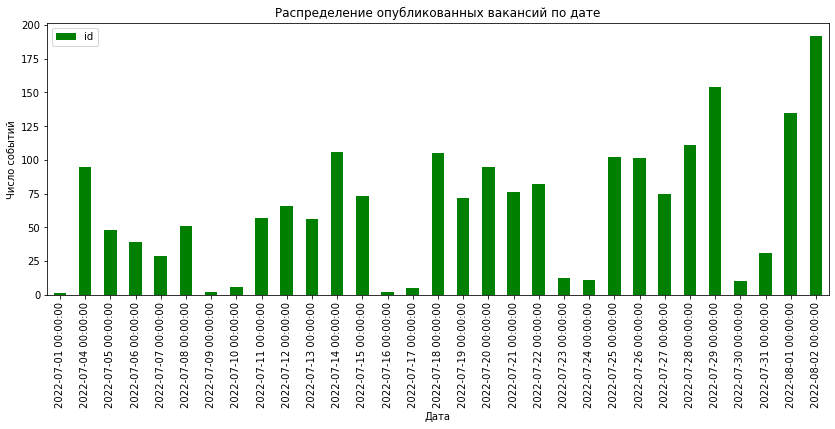

In [19]:
# Построим график опубликованных вакансий по датам
import matplotlib.pyplot as plt

df.groupby('published_at').agg({'id':'count'}).plot(kind='bar', figsize = (14,5), color = 'green')
plt.title('Распределение опубликованных вакансий по дате')
plt.xlabel("Дата")
plt.ylabel("Число событий")
plt.xticks(rotation=90)
plt.show()

In [20]:
# Переведем даты в дни недели, и определим день недели, в который больше всего публикуют вакансий
df['weekday'] = df['published_at'].apply(lambda x: x.weekday())

In [21]:
df['weekday'].value_counts()

0    494
1    479
4    361
3    322
2    265
6     53
5     26
Name: weekday, dtype: int64

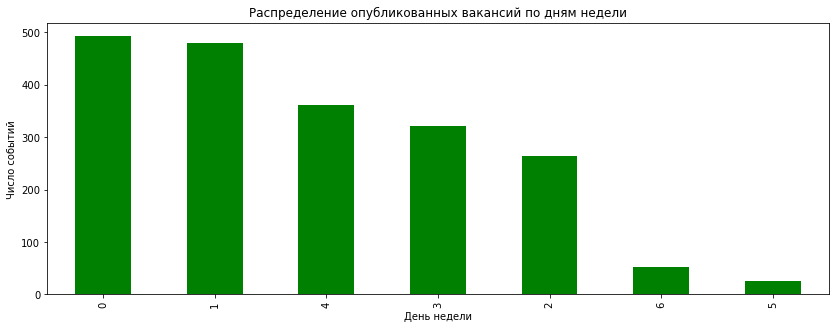

In [22]:
df['weekday'].value_counts().plot(kind='bar', figsize = (14,5), color = 'green')
plt.title('Распределение опубликованных вакансий по дням недели')
plt.xlabel("День недели")
plt.ylabel("Число событий")
plt.show()

Итак, больше всего публикуют в понедельник и вторниик

In [23]:
# Найдем те вакансии с использованием python, которые мне интересны (Старший менеджер по обслуживанию)

In [24]:
df.name.value_counts()

Старший менеджер по обслуживанию                                                       236
Старший клиентский менеджер                                                            211
Клиентский менеджер прямых продаж                                                      102
Менеджер по работе с ключевыми клиентами малого бизнеса                                 48
Водитель-инкассатор                                                                     26
                                                                                      ... 
Старший менеджер по обслуживанию (с. Званное)                                            1
Junior ABAP разработчик                                                                  1
Старший менеджер по обслуживанию (с.Красноселькуп)                                       1
Главный специалист контроля соблюдения регуляторных требований на финансовых рынках      1
Аналитик по операционным расходам                                                        1

In [45]:
new_df = df[df.name=='Старший менеджер по обслуживанию']
new_df

,id,premium,relations,name,insider_interview,response_letter_required,allow_messages,contacts,description,branded_description,...,salary,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,department,skills,weekday
5,67454679,False,[],Старший менеджер по обслуживанию,None,False,True,None,<p>Сбер — лучший работодатель России. У нас бо...,\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0
12,68039955,False,[],Старший менеджер по обслуживанию,None,False,True,None,"<p>Сбер — это более 60 компаний экосистемы, 14...",\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MS Outlook,Клиентоориентированность,Работа в к...",2
46,67660590,False,[],Старший менеджер по обслуживанию,None,False,True,None,<p>Сбер — лучший работодатель России. У нас бо...,\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0
86,68286522,False,[],Старший менеджер по обслуживанию,None,False,True,None,<p>Сбер — лучший работодатель России. У нас бо...,\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,4
96,68064231,False,[],Старший менеджер по обслуживанию,None,False,True,None,<p>Сбер — лучший работодатель России. У нас бо...,\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Работа в команде,Навыки продаж,Клиентоориентир...",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935,68038727,False,[],Старший менеджер по обслуживанию,None,False,True,None,<p>Сбер — лучший работодатель России. У нас бо...,\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,3
1953,55903517,False,[],Старший менеджер по обслуживанию,None,False,True,None,"<p>Сбер — это более 60 компаний экосистемы, 14...",\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,5
1979,67906989,False,[],Старший менеджер по обслуживанию,None,False,True,None,<p>Сбер — лучший работодатель России. У нас бо...,\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,1
1990,67900872,False,[],Старший менеджер по обслуживанию,None,False,True,None,<p>Сбер — лучший работодатель России. У нас бо...,\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,1


In [46]:
# Определите по полю skills какие навыки больше всего востребованы для этих вакансий
new_df.skills

5                                                        
12      MS Outlook,Клиентоориентированность,Работа в к...
46                                                       
86                                                       
96      Работа в команде,Навыки продаж,Клиентоориентир...
                              ...                        
1935                                                     
1953                                                     
1979                                                     
1990                                                     
1993    Работа в команде,Работа с клиентами,Банковское...
Name: skills, Length: 236, dtype: object

In [47]:
# найдем топ 5 навыков для этой вакансии
from collections import Counter

list_of_skills_new_df =new_df['key_skills'].apply(lambda s: ",".join([x.get('name') for x in s])).tolist()
c= Counter([x for x in ','.join(list_of_skills_new_df).split(',') if x !=""])
c.most_common(5)

[('Работа в команде', 49),
 ('Работа с клиентами', 41),
 ('Клиентоориентированность', 38),
 ('Деловое общение', 31),
 ('Деловая переписка', 29)]

In [53]:
#найдем топ-5 навыков для вакансии Аналитик  и построим график

analitic = df[df.name=='Аналитик']
analitic

,id,premium,relations,name,insider_interview,response_letter_required,allow_messages,contacts,description,branded_description,...,salary,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,department,skills,weekday
431,68348917,False,[],Аналитик,None,False,True,None,<p>Наша команда занимается проектом по техноло...,\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"UML,SQL,Тестирование,MS SQL,СУБД",0
657,67414601,False,[],Аналитик,None,False,True,None,<strong>Обязанности:</strong> <ul> <li>Подгото...,\n<style>\n.swiper-container {\n margin: 0 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SQL,Python,Математическая статистика,Математич...",1


In [54]:
list_skills_analitic =analitic['key_skills'].apply(lambda s: ",".join([x.get('name') for x in s])).tolist()
c= Counter([x for x in ','.join(list_skills_analitic).split(',') if x !=""])
c.most_common(5)

[('SQL', 2), ('UML', 1), ('Тестирование', 1), ('MS SQL', 1), ('СУБД', 1)]

In [79]:
# Приведем список к объекту Series
list =[x for x in ','.join(list_skills_analitic).split(',') if x !=""]

In [80]:
list_series = pd.Series(list)
new_list = pd.Series(list_series.value_counts())
new_list

SQL                          2
UML                          1
MS PowerPoint                1
Математическая статистика    1
Математический анализ        1
Python                       1
MS SQL                       1
Тестирование                 1
СУБД                         1
dtype: int64

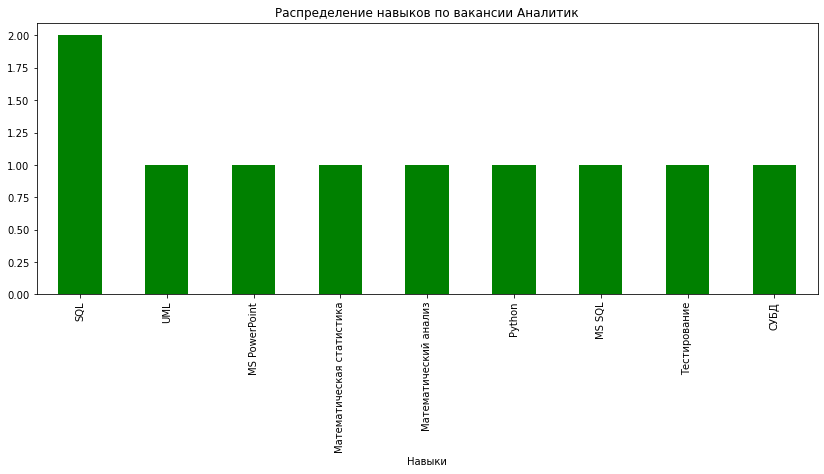

In [82]:
# Постройте график наиболее востребованных навыков для аналитика данных
new_list.plot(kind='bar', figsize = (14,5), color = 'green')
plt.title('Распределение навыков по вакансии Аналитик')
plt.xlabel("Навыки")
plt.show()